In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data=pd.read_csv("Finance.csv").dropna(axis=1, how='all')
print(data)

   Series_reference   Period  Data_value STATUS    UNITS
0     BDCQ.SF1AA2CA  2016.06    1116.386      F  Dollars
1     BDCQ.SF1AA2CA  2016.09    1070.874      F  Dollars
2     BDCQ.SF1AA2CA  2016.12    1054.408      F  Dollars
3     BDCQ.SF1AA2CA  2017.03    1010.665      F  Dollars
4     BDCQ.SF1AA2CA  2017.06    1233.700      F  Dollars
5     BDCQ.SF1AA2CA  2017.09    1282.436      F  Dollars
6     BDCQ.SF1AA2CA  2017.12    1290.820      F  Dollars
7     BDCQ.SF1AA2CA  2018.03    1412.007      F  Dollars
8     BDCQ.SF1AA2CA  2018.06    1488.055      F  Dollars
9     BDCQ.SF1AA2CA  2018.09    1497.678      F  Dollars
10    BDCQ.SF1AA2CA  2018.12    1570.507      F  Dollars
11    BDCQ.SF1AA2CA  2019.03    1393.749      F  Dollars
12    BDCQ.SF1AA2CA  2019.06    1517.143      F  Dollars
13    BDCQ.SF1AA2CA  2019.09    1381.514      F  Dollars
14    BDCQ.SF1AA2CA  2019.12    1370.985      F  Dollars
15    BDCQ.SF1AA2CA  2020.03    1073.017      F  Dollars
16    BDCQ.SF1AA2CA  2020.06   

In [ ]:
data["Period"].unique()

array([2016.06, 2016.09, 2016.12, 2017.03, 2017.06, 2017.09, 2017.12,
       2018.03, 2018.06, 2018.09, 2018.12, 2019.03, 2019.06, 2019.09,
       2019.12, 2020.03, 2020.06, 2020.09, 2020.12, 2021.03, 2021.06,
       2021.09, 2021.12])

In [ ]:
data.head()

,Series_reference,Period,Data_value,STATUS,UNITS
0,BDCQ.SF1AA2CA,2016.06,1116.386,F,Dollars
1,BDCQ.SF1AA2CA,2016.09,1070.874,F,Dollars
2,BDCQ.SF1AA2CA,2016.12,1054.408,F,Dollars
3,BDCQ.SF1AA2CA,2017.03,1010.665,F,Dollars
4,BDCQ.SF1AA2CA,2017.06,1233.700,F,Dollars


In [ ]:
data["class"] = [1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1]
print(data)

   Series_reference   Period  Data_value STATUS    UNITS  class
0     BDCQ.SF1AA2CA  2016.06    1116.386      F  Dollars      1
1     BDCQ.SF1AA2CA  2016.09    1070.874      F  Dollars      1
2     BDCQ.SF1AA2CA  2016.12    1054.408      F  Dollars      1
3     BDCQ.SF1AA2CA  2017.03    1010.665      F  Dollars      0
4     BDCQ.SF1AA2CA  2017.06    1233.700      F  Dollars      0
5     BDCQ.SF1AA2CA  2017.09    1282.436      F  Dollars      1
6     BDCQ.SF1AA2CA  2017.12    1290.820      F  Dollars      0
7     BDCQ.SF1AA2CA  2018.03    1412.007      F  Dollars      1
8     BDCQ.SF1AA2CA  2018.06    1488.055      F  Dollars      1
9     BDCQ.SF1AA2CA  2018.09    1497.678      F  Dollars      1
10    BDCQ.SF1AA2CA  2018.12    1570.507      F  Dollars      0
11    BDCQ.SF1AA2CA  2019.03    1393.749      F  Dollars      1
12    BDCQ.SF1AA2CA  2019.06    1517.143      F  Dollars      1
13    BDCQ.SF1AA2CA  2019.09    1381.514      F  Dollars      0
14    BDCQ.SF1AA2CA  2019.12    1370.985

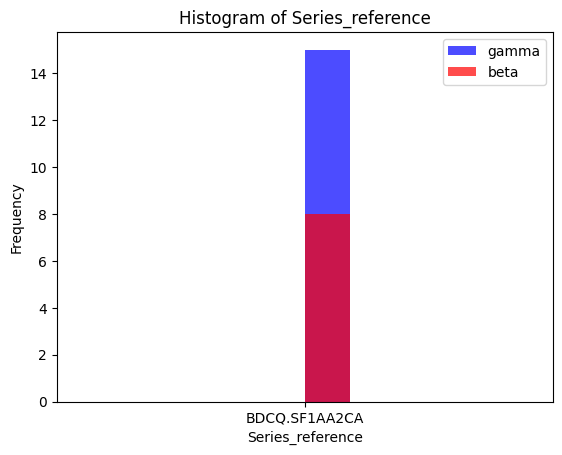

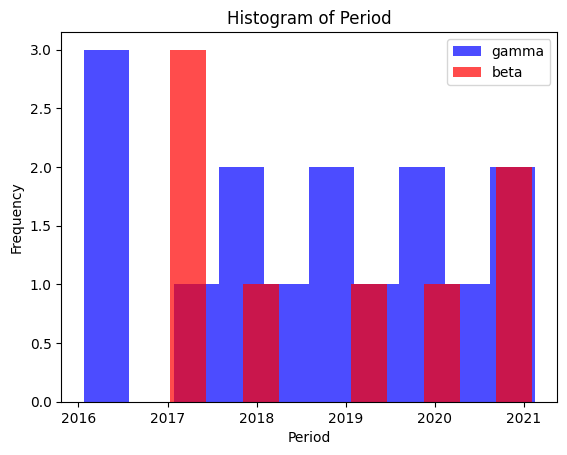

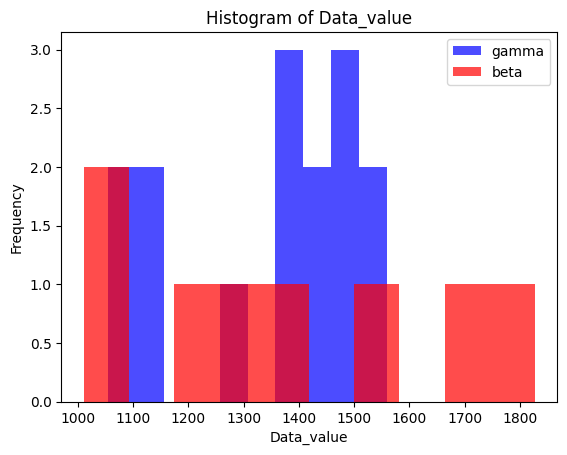

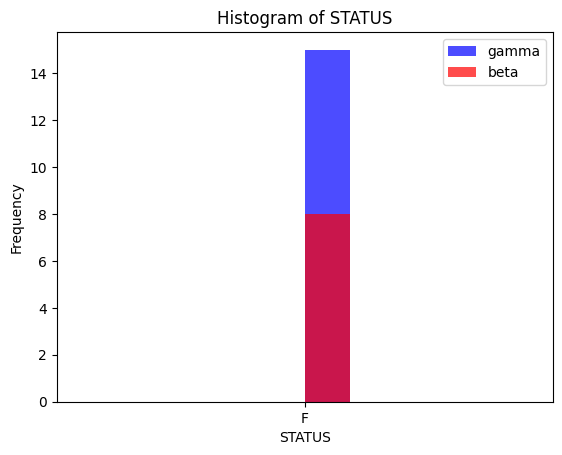

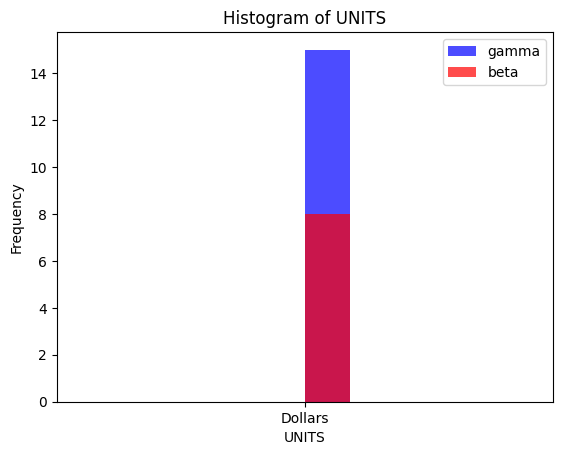

In [ ]:
for label in data.columns[:-1]:
  plt.hist(data[data["class"]==1][label],alpha=0.7,label="gamma" ,color="blue")
  plt.hist(data[data["class"]==0][label],alpha=0.7,label="beta",color="red")
  plt.title("Histogram of "+label)
  plt.xlabel(label)
  plt.ylabel("Frequency")
  plt.legend()
  plt.show()

In [ ]:
train,valid,test=np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
    # Select only numerical features for scaling, exclude 'Period' column
    numerical_features = dataframe.select_dtypes(include=np.number).columns[:-1]
    X = dataframe[numerical_features].values
    Y = dataframe[dataframe.columns[-1]].values

    scale = StandardScaler()
    X = scale.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y) # Correct typo: 'fit_reample' to 'fit_resample'

    data = np.hstack((X, np.reshape(Y, (-1, 1))))
    return data, X, Y

In [ ]:
# Changed code to avoid overwriting the original 'train' DataFrame
train_scaled, x_train, y_train = scale_dataset(train, oversample=True)
valid_scaled, x_valid, y_valid = scale_dataset(valid, oversample=False)
test_scaled, x_test, y_test = scale_dataset(test, oversample=False)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
k_pred=knn_model.predict(x_test)

In [ ]:
k_pred

array([1, 1, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 1, 1])

In [ ]:
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



In [ ]:
y_pred

array([1, 1, 1, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 1, 1])

#Logistic Rregression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



#Neural Network



In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5)) # add nrows and ncols
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch') # Change xlabel to set_xlabel
  ax1.set_ylabel('Binary crossentropy') # Change ylabel to set_ylabel
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch') # Change xlabel to set_xlabel
  ax2.set_ylabel('Accuracy') # Change ylabel to set_ylabel
  ax2.legend()
  ax2.grid(True)

  plt.show() # Display the figure with both subplots

In [ ]:
def train_model(nodes,dropout_prob,epochs,batch_size,x_trian,y_train, x_valid,y_valid):
    #create a model using a tensorflow library
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    #Compille the model
    nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    #train the model
    history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_valid,y_valid))
    return nn_model,history

Nodes: 16, Dropout: 0, Batch Size: 2
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5639 - loss: 0.6657 - val_accuracy: 0.4000 - val_loss: 0.7647
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7657 - loss: 0.6556 - val_accuracy: 0.4000 - val_loss: 0.7807
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5689 - loss: 0.6735 - val_accuracy: 0.4000 - val_loss: 0.7910
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8000 - loss: 0.6378 - val_accuracy: 0.4000 - val_loss: 0.8060
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7053 - loss: 0.6787 - val_accuracy: 0.2000 - val_loss: 0.8206
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7537 - loss: 0.6451 - val_accuracy: 0.2000 - val_loss: 0.8368
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8595 - loss: 0.6120 - val_accuracy: 0.2000 - val_loss: 0.8551
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7315 - loss: 0.5711 

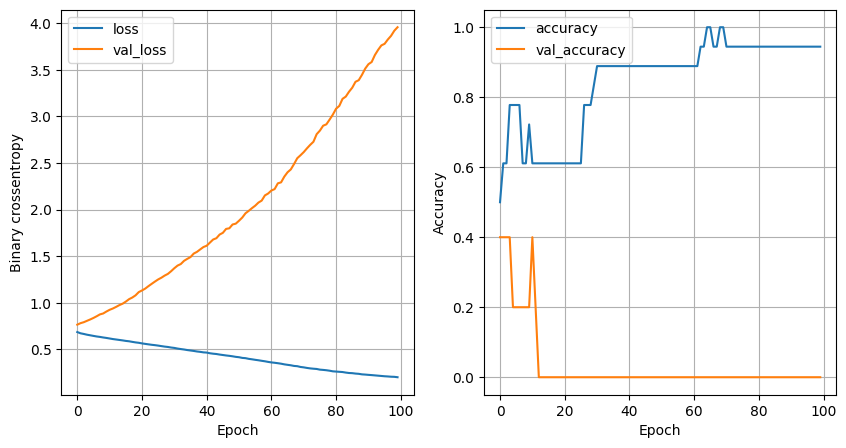

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: 3.9568
Nodes: 16, Dropout: 0, Batch Size: 4
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6192 - loss: 0.7059 - val_accuracy: 0.2000 - val_loss: 0.6958
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6852 - loss: 0.6926 - val_accuracy: 0.2000 - val_loss: 0.7021
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7373 - loss: 0.6799 - val_accuracy: 0.2000 - val_loss: 0.7078
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5775 - loss: 0.6882 - val_accuracy: 0.2000 - val_loss: 0.7145
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6956 - loss: 0.6799 - val_accuracy: 0.2000 - val_loss: 0.7215
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5914 - loss: 0.6922 - val_accuracy: 0.2000 - val_loss: 0.7276
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7164 - loss: 0.6730 - val_accuracy: 0.2000 - val_loss: 0.7329
Epoch

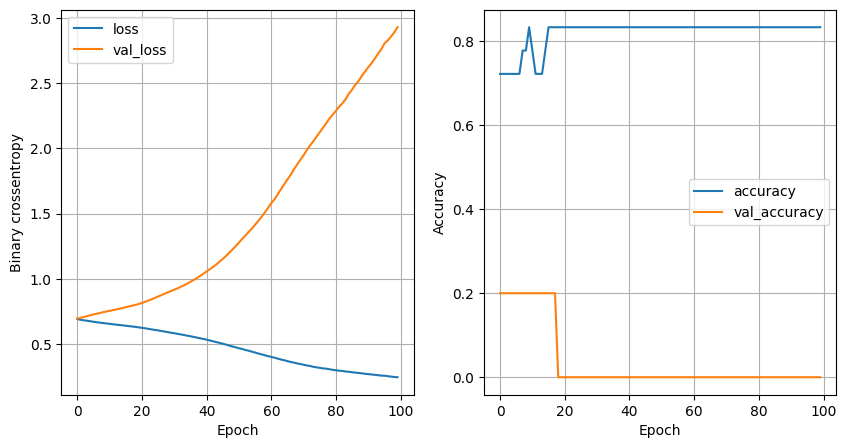

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0000e+00 - loss: 2.9294
Nodes: 16, Dropout: 0, Batch Size: 6
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5347 - loss: 0.7073 - val_accuracy: 0.2000 - val_loss: 0.6978
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4931 - loss: 0.7193 - val_accuracy: 0.4000 - val_loss: 0.6993
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5139 - loss: 0.7115 - val_accuracy: 0.4000 - val_loss: 0.7020
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5139 - loss: 0.7024 - val_accuracy: 0.4000 - val_loss: 0.7046
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4514 - loss: 0.7111 - val_accuracy: 0.4000 - val_loss: 0.7075
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3472 - loss: 0.7221 - val_accuracy: 0.4000 - val_loss: 0.7101
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4514 - loss: 0.7052 - val_accuracy: 0.4000 - val_loss: 0.7134
Epoc

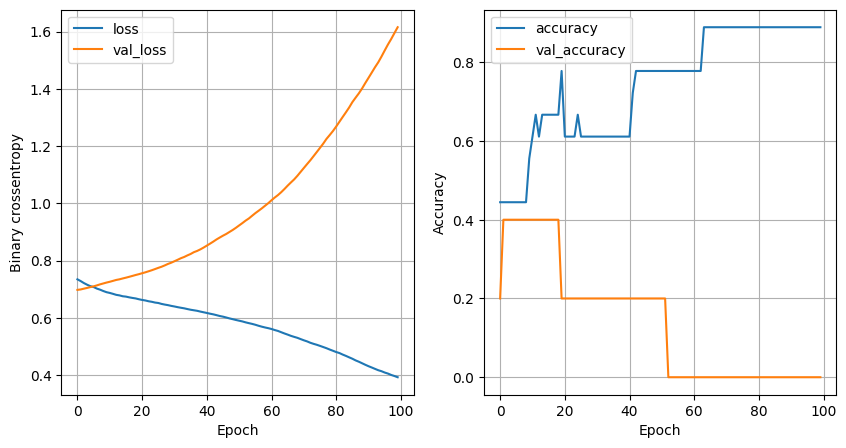

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 1.6152
Nodes: 16, Dropout: 0.2, Batch Size: 2
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5433 - loss: 0.6528 - val_accuracy: 0.6000 - val_loss: 0.7970
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6047 - loss: 0.6322 - val_accuracy: 0.6000 - val_loss: 0.8044
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2759 - loss: 0.7273 - val_accuracy: 0.4000 - val_loss: 0.8135
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5585 - loss: 0.6771 - val_accuracy: 0.4000 - val_loss: 0.8230
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5317 - loss: 0.6536 - val_accuracy: 0.4000 - val_loss: 0.8316
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6014 - loss: 0.6689 - val_accuracy: 0.4000 - val_loss: 0.8361
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5854 - loss: 0.6283 - val_accuracy: 0.4000 - val_loss: 0.8454
Epo

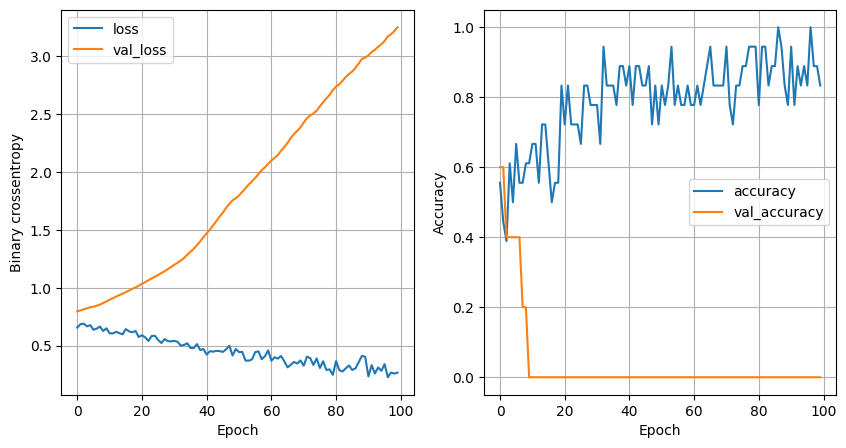

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 3.2511
Nodes: 16, Dropout: 0.2, Batch Size: 4
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7512 - loss: 0.6375 - val_accuracy: 0.0000e+00 - val_loss: 0.8223
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5289 - loss: 0.6863 - val_accuracy: 0.0000e+00 - val_loss: 0.8356
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7245 - loss: 0.6172 - val_accuracy: 0.0000e+00 - val_loss: 0.8479
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6875 - loss: 0.6461 - val_accuracy: 0.0000e+00 - val_loss: 0.8575
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7199 - loss: 0.6403 - val_accuracy: 0.0000e+00 - val_loss: 0.8714
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5613 - loss: 0.6379 - val_accuracy: 0.0000e+00 - val_loss: 0.8853
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4259 - loss: 0.6690 - val_accuracy: 0.000

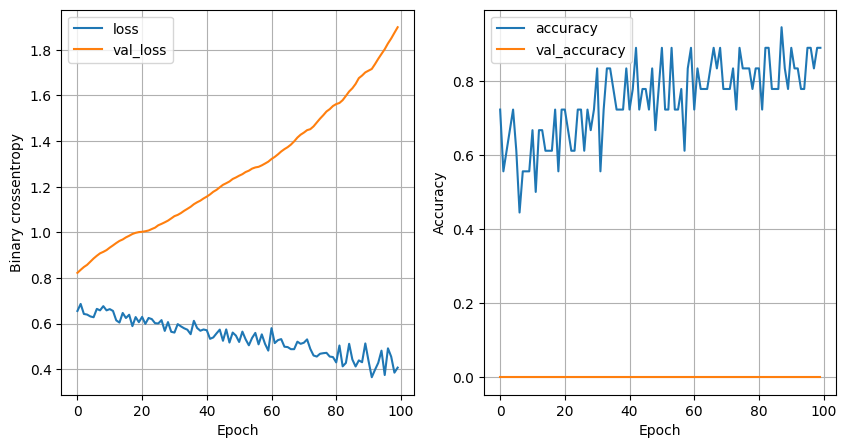

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 1.8993
Nodes: 16, Dropout: 0.2, Batch Size: 6
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.5903 - loss: 0.7370 - val_accuracy: 0.4000 - val_loss: 0.6873
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4931 - loss: 0.7215 - val_accuracy: 0.4000 - val_loss: 0.6904
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5694 - loss: 0.7073 - val_accuracy: 0.2000 - val_loss: 0.6947
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3889 - loss: 0.7176 - val_accuracy: 0.2000 - val_loss: 0.6994
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5694 - loss: 0.6757 - val_accuracy: 0.2000 - val_loss: 0.7042
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6892 - val_accuracy: 0.2000 - val_loss: 0.7096
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6944 - loss: 0.6764 - val_accuracy: 0.2000 - val_loss: 0.7154
Ep

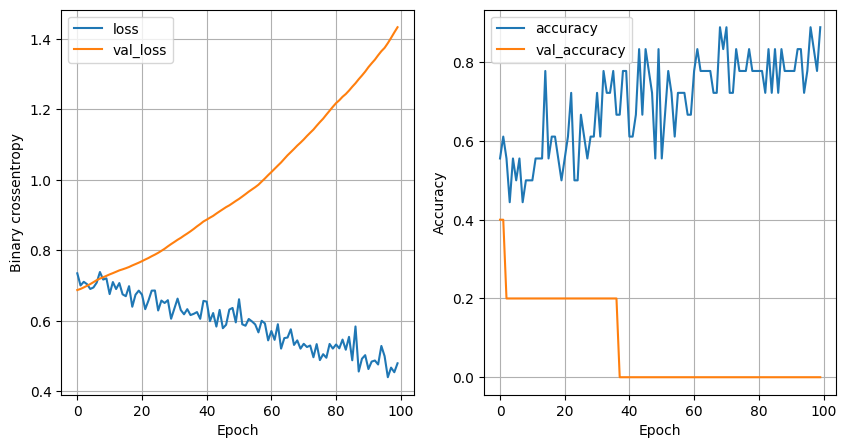

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4334
Nodes: 32, Dropout: 0, Batch Size: 2
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4984 - loss: 0.6898 - val_accuracy: 0.4000 - val_loss: 0.6899
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7299 - loss: 0.6742 - val_accuracy: 0.4000 - val_loss: 0.7153
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6373 - loss: 0.6654 - val_accuracy: 0.0000e+00 - val_loss: 0.7477
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4566 - loss: 0.6685 - val_accuracy: 0.0000e+00 - val_loss: 0.7762
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7990 - loss: 0.6358 - val_accuracy: 0.0000e+00 - val_loss: 0.8082
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8998 - loss: 0.6223 - val_accuracy: 0.0000e+00 - val_loss: 0.8407
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9162 - loss: 0.5917 - val_accuracy: 0.0000e+00 - va

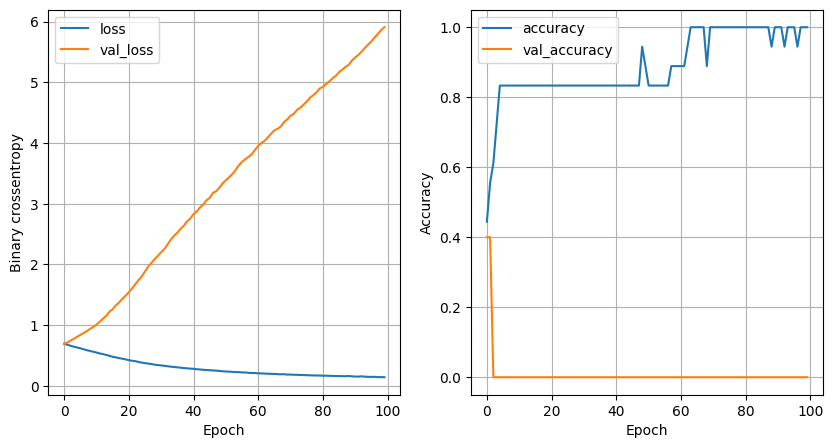

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 5.9091
Nodes: 32, Dropout: 0, Batch Size: 4
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4005 - loss: 0.7070 - val_accuracy: 0.4000 - val_loss: 0.7464
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5451 - loss: 0.6782 - val_accuracy: 0.6000 - val_loss: 0.7660
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6481 - loss: 0.6578 - val_accuracy: 0.0000e+00 - val_loss: 0.7871
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6748 - loss: 0.6610 - val_accuracy: 0.0000e+00 - val_loss: 0.8048
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6319 - loss: 0.6542 - val_accuracy: 0.0000e+00 - val_loss: 0.8209
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6377 - loss: 0.6502 - val_accuracy: 0.0000e+00 - val_loss: 0.8380
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5093 - loss: 0.6433 - val_accuracy: 0.0000e+00 - va

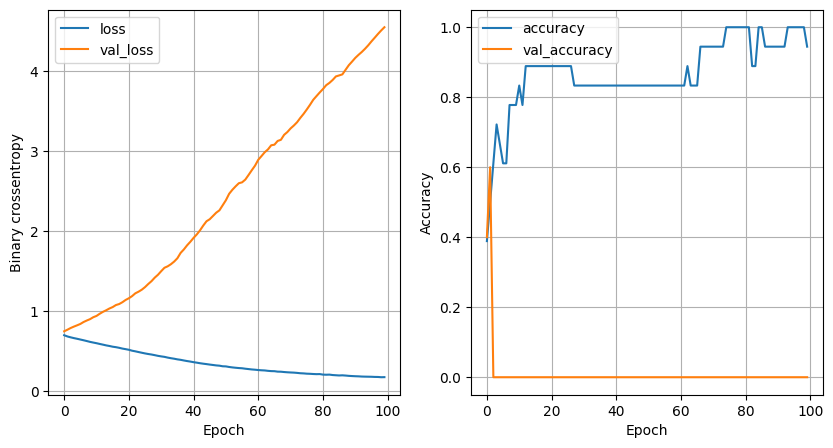

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: 4.5437
Nodes: 32, Dropout: 0, Batch Size: 6
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.2153 - loss: 0.7032 - val_accuracy: 0.4000 - val_loss: 0.6542
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4028 - loss: 0.6957 - val_accuracy: 0.4000 - val_loss: 0.6659
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4653 - loss: 0.6798 - val_accuracy: 0.4000 - val_loss: 0.6771
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7778 - loss: 0.6697 - val_accuracy: 0.4000 - val_loss: 0.6881
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7639 - loss: 0.6726 - val_accuracy: 0.4000 - val_loss: 0.6985
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7639 - loss: 0.6712 - val_accuracy: 0.4000 - val_loss: 0.7091
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7222 - loss: 0.6538 - val_accuracy: 0.4000 - val_loss: 0.7193
Epoc

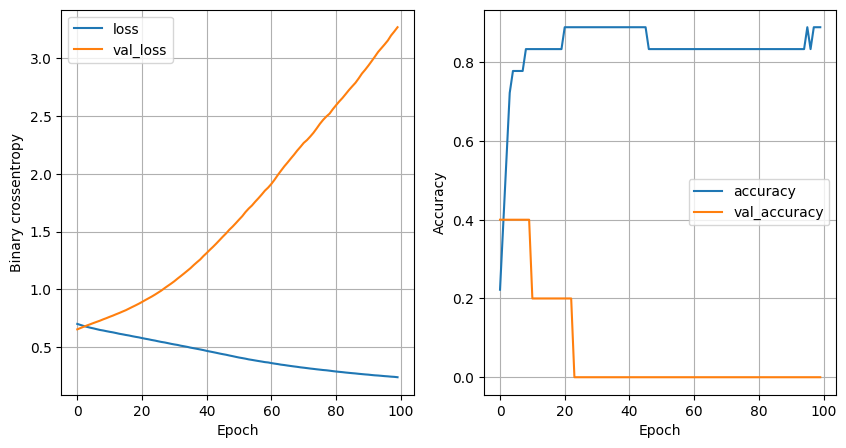

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 3.2708
Nodes: 32, Dropout: 0.2, Batch Size: 2
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3729 - loss: 0.7437 - val_accuracy: 0.4000 - val_loss: 0.7377
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8455 - loss: 0.6295 - val_accuracy: 0.2000 - val_loss: 0.7608
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4440 - loss: 0.6794 - val_accuracy: 0.2000 - val_loss: 0.7801
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5606 - loss: 0.7101 - val_accuracy: 0.2000 - val_loss: 0.7948
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4722 - loss: 0.6588 - val_accuracy: 0.0000e+00 - val_loss: 0.8105
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7803 - loss: 0.6177 - val_accuracy: 0.0000e+00 - val_loss: 0.8282
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6303 - loss: 0.6926 - val_accuracy: 0.0000e+00 - val_loss

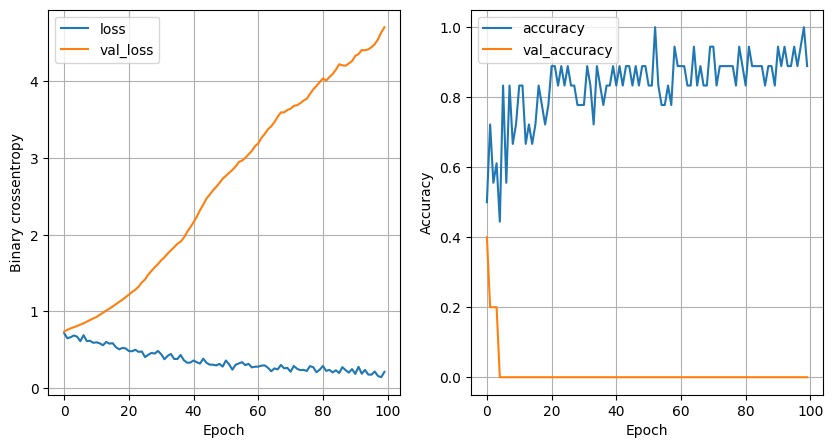

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 4.7064
Nodes: 32, Dropout: 0.2, Batch Size: 4
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4896 - loss: 0.6860 - val_accuracy: 0.4000 - val_loss: 0.6583
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4051 - loss: 0.6792 - val_accuracy: 0.4000 - val_loss: 0.6727
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4734 - loss: 0.6873 - val_accuracy: 0.4000 - val_loss: 0.6908
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4699 - loss: 0.6824 - val_accuracy: 0.4000 - val_loss: 0.7077
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4468 - loss: 0.6634 - val_accuracy: 0.4000 - val_loss: 0.7245
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7106 - loss: 0.6568 - val_accuracy: 0.4000 - val_loss: 0.7406
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4896 - loss: 0.6590 - val_accuracy: 0.4000 - val_loss: 0.7527
Epo

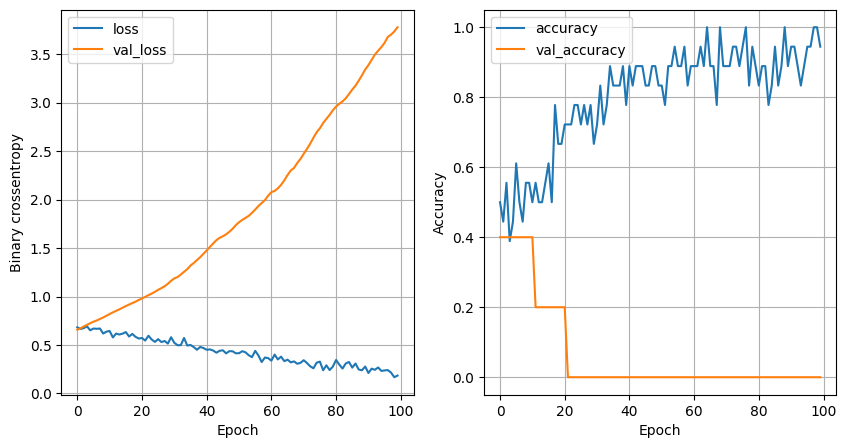

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0000e+00 - loss: 3.7781
Nodes: 32, Dropout: 0.2, Batch Size: 6
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.4653 - loss: 0.6833 - val_accuracy: 0.6000 - val_loss: 0.7172
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6875 - loss: 0.6543 - val_accuracy: 0.6000 - val_loss: 0.7326
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6111 - loss: 0.6624 - val_accuracy: 0.6000 - val_loss: 0.7457
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7778 - loss: 0.6252 - val_accuracy: 0.6000 - val_loss: 0.7592
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4792 - loss: 0.6842 - val_accuracy: 0.6000 - val_loss: 0.7730
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6319 - loss: 0.6719 - val_accuracy: 0.4000 - val_loss: 0.7880
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3125 - loss: 0.6943 - val_accuracy: 0.2000 - val_loss: 0.8022
Ep

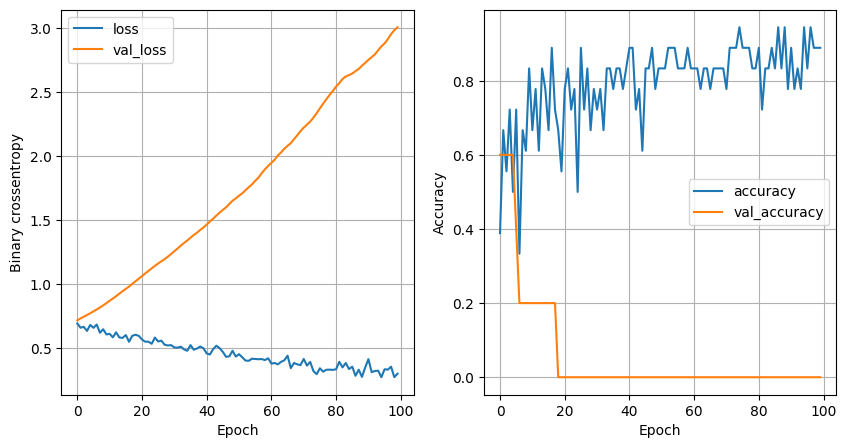

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 3.0080
Nodes: 64, Dropout: 0, Batch Size: 2
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4831 - loss: 0.6814 - val_accuracy: 0.4000 - val_loss: 0.7253
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6692 - loss: 0.6686 - val_accuracy: 0.0000e+00 - val_loss: 0.7717
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7660 - loss: 0.6227 - val_accuracy: 0.0000e+00 - val_loss: 0.8225
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7125 - loss: 0.6142 - val_accuracy: 0.0000e+00 - val_loss: 0.8730
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8713 - loss: 0.5539 - val_accuracy: 0.0000e+00 - val_loss: 0.9270
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7475 - loss: 0.5297 - val_accuracy: 0.0000e+00 - val_loss: 0.9937
Epoch 7/100


KeyboardInterrupt: 

In [ ]:
least_val_loss=float('inf')
least_val_model=None
epochs=100
for nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for batch_size in [2,4,6]:
      print(f"Nodes: {nodes}, Dropout: {dropout_prob}, Batch Size: {batch_size}")
      model,history=train_model(nodes,dropout_prob,epochs,batch_size,x_train,y_train,x_valid,y_valid)
      plot_loss(history)
      val_loss=model.evaluate(x_valid,y_valid)[0]
      if val_loss<least_val_loss:
        least_val_loss=val_loss
        least_val_model=model

In [ ]:
y_pred=least_val_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[1 1 1 0 0]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5

